In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
timestamp = pd.Timestamp(datetime(2022,12,1))

In [3]:
timestamp

Timestamp('2022-12-01 00:00:00')

In [4]:
type(timestamp)

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
timestamp.year

2022

In [6]:
timestamp.day_name()

'Thursday'

In [7]:
timestamp.month

12

In [8]:
timestamp.month_name()

'December'

In [9]:
period = pd.Period("2020-01")

In [10]:
period.asfreq("D")

Period('2020-01-31', 'D')

In [11]:
period.to_timestamp()

Timestamp('2020-01-01 00:00:00')

In [12]:
period.to_timestamp().to_period("M")

Period('2020-01', 'M')

In [13]:
period+2

Period('2020-03', 'M')

In [14]:
#Seqence of Date
index = pd.date_range(start="2022-1-2",periods=12,freq="M")

In [15]:
index

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', freq='M')

In [16]:
index[0]

Timestamp('2022-01-31 00:00:00', freq='M')

In [17]:
index.to_period()

PeriodIndex(['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
             '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12'],
            dtype='period[M]')

In [18]:
pd.DataFrame({"data":index}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    12 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 224.0 bytes


In [19]:
data = np.random.random(size=(12,2))

In [20]:
pd.DataFrame(data=data, index=index).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2022-01-31 to 2022-12-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   1       12 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [21]:
# Create the range of dates here
seven_days = pd.date_range(start="2017-1-1",periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())



6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


In [22]:
#Indexing and resampling time series

In [23]:
google = pd.read_csv("data/google.csv")

In [24]:
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [25]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [26]:
google["Date"] = pd.to_datetime(google["Date"])

In [27]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1094 non-null   datetime64[ns]
 1   Close   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [28]:
google.set_index("Date",inplace=True)

In [29]:
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


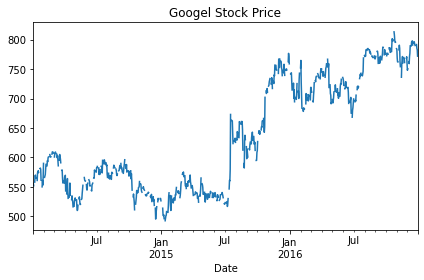

In [30]:
google.Close.plot(title="Googel Stock Price")
plt.tight_layout()

In [31]:
google["2015"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


C:\Users\Owner\AppData\Local\Temp\ipykernel_11268\567669093.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  google["2015"].info()


In [32]:
google["2015"].head(20)

C:\Users\Owner\AppData\Local\Temp\ipykernel_11268\2151250767.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  google["2015"].head(20)


,Close
Date,
2015-01-01,NaN
2015-01-02,524.81
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,513.87
2015-01-06,501.96
2015-01-07,501.10
2015-01-08,502.68
2015-01-09,496.17


In [33]:
google["2015-3": "2016-2"]

,Close
Date,
2015-03-01,NaN
2015-03-02,571.34
2015-03-03,573.64
2015-03-04,573.37
2015-03-05,575.33
...,...
2016-02-25,705.75
2016-02-26,705.07
2016-02-27,NaN


In [34]:
google.loc["2016-6-1",'Close']

734.15

In [35]:
google.asfreq("D").info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [36]:
google.asfreq("D").head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [38]:
google =google.asfreq("B") #business day freq

In [39]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2014-01-02 to 2016-12-30
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [40]:
google[google.Close.isnull()]

,Close
Date,
2014-01-20,NaN
2014-02-17,NaN
2014-04-18,NaN
2014-05-26,NaN
2014-07-04,NaN
2014-09-01,NaN
2014-11-27,NaN
2014-12-25,NaN
2015-01-01,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


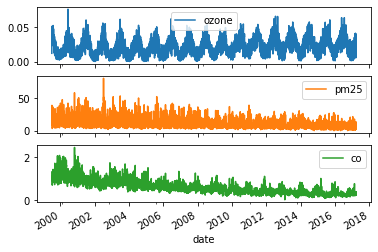

In [41]:
data = pd.read_csv('data/nyc.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data["date"]=pd.to_datetime(data["date"])


# Set date column as index
data.set_index("date",inplace=True)

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=True)
plt.show()


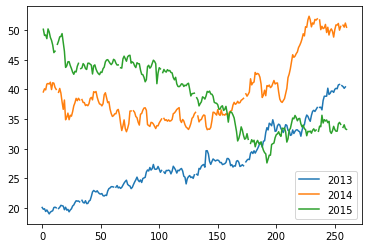

In [52]:
yahoo = pd.read_csv("data/yahoo.csv")
yahoo["date"] = pd.to_datetime(yahoo["date"])
yahoo.set_index("date",inplace=True)

# yahoo["year"] = yahoo.index.dt.year
yahoo.head()
# # Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()

In [54]:
co = pd.read_csv("data/co_cities.csv")
co["date"] = pd.to_datetime(co["date"])
co.set_index("date",inplace=True)

In [55]:
co.head()

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
2005-01-06,0.572917,0.792596,0.815761


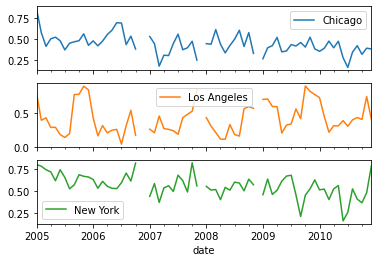

In [60]:
# # Inspect data
# print(co.info())

# # Set the frequency to calendar daily
# co = co.asfreq("D")

# # Plot the data
# co.plot()
# # plt.show()


# Set frequency to monthly
co = co.asfreq("M")

# Plot the data

co.plot(subplots=True)
plt.show()


In [61]:
#lags, changes anf returns for stock price series

In [65]:
google = pd.read_csv("data/google.csv", parse_dates=["Date"], index_col='Date')
google.head()


,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [66]:
#shift() move data betwwen the past adn the future
# default period is 1

In [67]:
google["shifted"] = google["Close"].shift()

In [68]:
google.head(20)

,Close,shifted
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,556.00
2014-01-04,NaN,551.95
2014-01-05,NaN,NaN
2014-01-06,558.10,NaN
2014-01-07,568.86,558.10
2014-01-08,570.04,568.86
2014-01-09,564.55,570.04
2014-01-10,564.52,564.55


In [69]:
google["lagged"] = google["Close"].shift(periods=-1)

In [71]:
google.head(10)

,Close,shifted,lagged
Date,,,
2014-01-02,556.00,NaN,551.95
2014-01-03,551.95,556.00,NaN
2014-01-04,NaN,551.95,NaN
2014-01-05,NaN,NaN,558.10
2014-01-06,558.10,NaN,568.86
2014-01-07,568.86,558.10,570.04
2014-01-08,570.04,568.86,564.55
2014-01-09,564.55,570.04,564.52
2014-01-10,564.52,564.55,NaN


In [74]:
#Calculate one-period percent change
google["change"] = google.Close.div(google.shifted)
google[["Close","shifted","change"]].head(10)

,Close,shifted,change
Date,,,
2014-01-02,556.00,NaN,NaN
2014-01-03,551.95,556.00,0.992716
2014-01-04,NaN,551.95,NaN
2014-01-05,NaN,NaN,NaN
2014-01-06,558.10,NaN,NaN
2014-01-07,568.86,558.10,1.019280
2014-01-08,570.04,568.86,1.002074
2014-01-09,564.55,570.04,0.990369
2014-01-10,564.52,564.55,0.999947


In [75]:
google["return"] = google.change.sub(1).mul(100)
google[["Close","shifted","change","return"]].head(10)

,Close,shifted,change,return
Date,,,,
2014-01-02,556.00,NaN,NaN,NaN
2014-01-03,551.95,556.00,0.992716,-0.728417
2014-01-04,NaN,551.95,NaN,NaN
2014-01-05,NaN,NaN,NaN,NaN
2014-01-06,558.10,NaN,NaN,NaN
2014-01-07,568.86,558.10,1.019280,1.927970
2014-01-08,570.04,568.86,1.002074,0.207432
2014-01-09,564.55,570.04,0.990369,-0.963090
2014-01-10,564.52,564.55,0.999947,-0.005314


In [77]:
google["2015"]

C:\Users\Owner\AppData\Local\Temp\ipykernel_11268\4260816475.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  google["2015"]


,Close,shifted,lagged,change,return
Date,,,,,
2015-01-01,NaN,526.40,524.81,NaN,NaN
2015-01-02,524.81,NaN,NaN,NaN,NaN
2015-01-03,NaN,524.81,NaN,NaN,NaN
2015-01-04,NaN,NaN,513.87,NaN,NaN
2015-01-05,513.87,NaN,501.96,NaN,NaN
...,...,...,...,...,...
2015-12-27,NaN,NaN,762.51,NaN,NaN
2015-12-28,762.51,NaN,776.60,NaN,NaN
2015-12-29,776.60,762.51,771.00,1.018478,1.847845


In [84]:
# diff : Difference in value for two adjacent periods 
google["diff"] = google.Close.diff()

In [85]:
google[["Close","diff"]]

,Close,diff
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,-4.05
2014-01-04,NaN,NaN
2014-01-05,NaN,NaN
2014-01-06,558.10,NaN
...,...,...
2016-12-26,NaN,NaN
2016-12-27,791.55,NaN
2016-12-28,785.05,-6.50


In [86]:
google["pct_change"] = google.Close.pct_change().mul(100)

In [88]:
google[["Close", "return","pct_change"]].head(10)

,Close,return,pct_change
Date,,,
2014-01-02,556.00,NaN,NaN
2014-01-03,551.95,-0.728417,-0.728417
2014-01-04,NaN,NaN,0.000000
2014-01-05,NaN,NaN,0.000000
2014-01-06,558.10,NaN,1.114231
2014-01-07,568.86,1.927970,1.927970
2014-01-08,570.04,0.207432,0.207432
2014-01-09,564.55,-0.963090,-0.963090
2014-01-10,564.52,-0.005314,-0.005314


In [89]:
google["return_3d"] = google.Close.pct_change(periods=3).mul(100)

In [91]:
google[["Close", "return_3d"]].head(20)

,Close,return_3d
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,NaN
2014-01-04,NaN,NaN
2014-01-05,NaN,-0.728417
2014-01-06,558.10,1.114231
2014-01-07,568.86,3.063683
2014-01-08,570.04,3.277471
2014-01-09,564.55,1.155707
2014-01-10,564.52,-0.762929


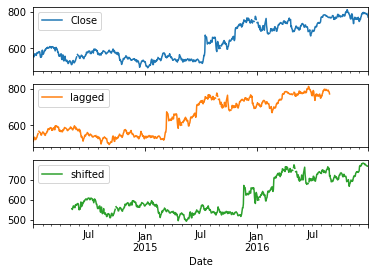

In [92]:
# Import data here
google = pd.read_csv("data/google.csv", parse_dates=["Date"], index_col='Date')

# Set data frequency to business daily
google = google.asfreq("B")

# Create 'lagged' and 'shifted'
google["lagged"] = google["Close"].shift(periods=-90)
google['shifted'] = google["Close"].shift(periods=90)

# Plot the google price series
google.plot(subplots=True)
plt.show()



In [94]:
yahoo = pd.read_csv("data/yahoo.csv", parse_dates=["date"], index_col='date')

# Created shifted_30 here
yahoo['shifted_30'] = yahoo["price"].shift(periods=30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo["price"].sub(yahoo['shifted_30'])

# Get the 30-day price difference
yahoo['diff_30'] =  yahoo['price'].diff(30)

# Inspect the last five rows of price
print(yahoo.tail())

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo['change_30'].sub(yahoo['diff_30']).value_counts())


            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

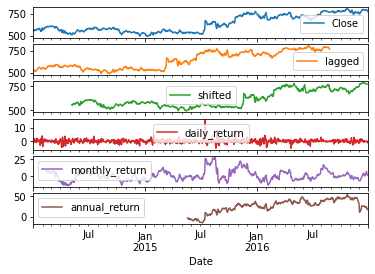

In [95]:
# Create daily_return
google['daily_return'] = google.Close.pct_change(periods=1)*100

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(periods=30)*100

# Create annual_return
google['annual_return'] = google.Close.pct_change(periods=360)*100

# Plot the result
google.plot(subplots=True)
plt.show

